<table align="left" width=100%>
    <tr>
        <td width="20%">
            <img src="faculty.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                  <b> Faculty Notebook <br> (Session 7,8) </b>
                </font>
            </div>
        </td>
    </tr>
</table>

## Table of Content

1. **[Import Libraries](#lib)**
2. **[One-way ANOVA](#1way)**
    - 2.1 - **[Post-hoc Analysis](#post-hoc)**


<a id="lib"></a>
# 1. Import Libraries

**Let us import the required libraries.**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

#for ANOVA
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

#for Chi Square Test
from scipy.stats import chi2_contingency
from scipy.stats import chi2

import warnings
warnings.filterwarnings("ignore")


<a id="1way"></a>
# 2. One-way ANOVA

It is used to check the equality of population means for more than two independent samples. Each group is considered as a `treatment`. It assumes that the samples are taken from normally distributed populations. To check this assumption we can use the `Shapiro-Wilk Test.` Also, the population variances should be equal; this can be tested using the `Levene's Test`.

The null and alternative hypothesis is given as:
<p style='text-indent:20em'> <strong> $H_{0}$: The averages of all treatments are the same. </strong></p>
<p style='text-indent:20em'> <strong> $H_{1}$: At least one treatment has a different average. </strong></p>


### Example:

#### 1. Total marks in aptitude exam are recorded for students with different race/ethnicity. Test whether all the races/ethnicities have an equal average score with 0.05 level of significance. 

Use the performance dataset of students available in the CSV file `students_data.csv`.

In [5]:
df = pd.read_csv("./data/students_data.csv")
df.head()

,gender,ethnicity,education,lunch,test_prep_course,math_score,reading_score,writing_score,total_score,training_institute
0,female,group B,bachelor's degree,standard,none,89,55,56,200,Nature Learning
1,female,group C,college,standard,completed,55,63,72,190,Nature Learning
2,female,group B,master's degree,standard,none,64,71,56,191,Nature Learning
3,male,group A,associate's degree,free/reduced,none,60,99,72,231,Nature Learning
4,male,group C,college,standard,none,75,66,51,192,Nature Learning


In [6]:
#Check the eethnicity groups
df['ethnicity'].unique()



array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [ ]:
#Hypothesis
#H0: all the group means are equal (claim)
#h1: at least one group have differnt mean

In [14]:
#Create the subgroup for each ethnicity
grpA=df[df['ethnicity']=='group A']['total_score']
grpB=df[df['ethnicity']=='group B']['total_score']
grpC=df[df['ethnicity']=='group C']['total_score']
grpD=df[df['ethnicity']=='group D']['total_score']
grpE=df[df['ethnicity']=='group E']['total_score']


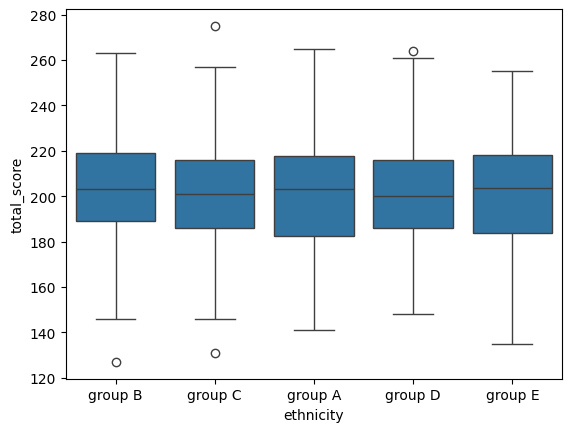

In [15]:
#Drwa Side by Side boxplots to get an idea of the difference of groups
sns.boxplot(x=df['ethnicity'], y=df['total_score'])
plt.show()

#Box plot points out that null hypothesis will not be rejected

In [29]:
#Critical Value
k=5
N=len(df)
dfN=k-1
dfD=N-k
cv =stats.f.isf(0.05, dfN, dfD)
print("Critical Value", cv)

Critical Value 2.3808758069291818


In [24]:
#Check for equality of variances 
stat, pval =stats.levene(grpA, grpB, grpC, grpD,  grpE)
print(pval, "Higher p-value shows equality of variances")



0.12649444001357793 Higher p-value shows equality of variances


In [25]:
#Check for one way ANOVA
stat, pval =stats.f_oneway(grpA, grpB, grpC, grpD,  grpE)
print(pval, stat)

0.5322937031083035 0.789109595922189


In [30]:
#Decision
print("Do not reject H0 since p-value >> 0.05 and test value < critical value ")

Do not reject H0 since p-value >> 0.05 and test value < critical value 


In [31]:
#Summary
print("There is not enough evidence to reject the claim and we conclude that ethicity is not all group means are equal ")

There is not enough evidence to reject the claim and we conclude that ethicity is not all group means are equal 


#### 2. Ryan is a production manager at an industry manufacturing alloy seals. They have 4 machines - A, B, C and D. Ryan wants to study whether all the machines have equal efficiency. Ryan collects data of tensile strength from all the 4 machines as given. Test at 5% level of significance.

<img src='1_ANOVA.png'>

In [32]:
A=pd.Series([68.7, 75.4, 70.9,79.1, 78.2])
B=pd.Series([62.7, 68.5, 63.1, 62.2, 60.3])
C=pd.Series([55.9, 56.1, 57.3, 59.2, 50.1])
D=pd.Series([80.7, 70.3, 80.9, 85.4, 82.3])

In [ ]:
#Hypothesis 
#H0: All groups means are equal (Claim)
#H1: Atleast one groups means is different 

In [36]:
#Critical Value
k=4
N=20
cv=stats.f.isf(0.05, k-1, N-k)
print("Critical Value = ", cv)

Critical Value =  3.238871517453585


In [39]:
#Perform Levene's Test
stat, pval = stats.levene(A,B,C,D)
print(pval, "The value of p-value shoes that varainaces are equal")


0.7570021212992085 The value of p-value shoes that varainaces are equal


In [41]:
#perform oneway ANOVA
stat, pval = stats.f_oneway(A,B,C,D)
print(stat,pval)

32.03072350199285 5.375613532781072e-07


In [ ]:
#Decision
print("Reject H0 since pval << 0.05 and Test Value >> Critical Value")

In [42]:
#Summary
print("There is enough evidence to reject H0 and conclude that machine's efficeincies are different")

There is enough evidence to reject H0 and conclude that machine's efficeincies are different


<a id="chisq"></a>
# 2. Chi-Square Test

It is a non-parametric test. `Non-parametric tests` do not require any assumptions on the parameter of the population from which the sample is taken. These tests can be applied to the ordinal/ nominal data. A non-parametric test can be performed on the data containing outliers.

The chi-square test statistic follows a Chi-square ($\chi^{2}$) distribution under the null hypothesis. It can be used to check the relationship between the categorical variables. 



<a id="ind"></a>
## 2.1 Chi-Square Test for Independence

This test is used to test whether the categorical variables are independent or not.

<p style='text-indent:20em'> <strong> $H_{0}$: The variables are independent</strong></p>
<p style='text-indent:20em'> <strong> $H_{1}$: The variables are not independent (i.e. variables are dependent)</strong></p>

### Example:

#### 1. Check if there is any relationship between the gender and education level of students with 95% confidence. 

Use the performance dataset of students available in the CSV file `students_data.csv`.

In [44]:
df = pd.read_csv("./data/students_data.csv")
df.columns

Index(['gender', 'ethnicity', 'education', 'lunch', 'test_prep_course',
       'math_score', 'reading_score', 'writing_score', 'total_score',
       'training_institute'],
      dtype='object')

In [ ]:
#Hypothesis

#H0: Education Level and Gender are indepenednent 
#H1: Education Level is depenednent on Gender (Claim)

In [46]:
#get the cross tabulation table
observed = pd.crosstab(df['gender'],df['education'])
observed

education,Ph.D.,associate's degree,bachelor's degree,college,high school,master's degree
gender,,,,,,
female,91,116,63,117,94,36
male,88,106,55,108,103,23


In [47]:
#Create the values of the table
observed_values = observed.values
observed_values

array([[ 91, 116,  63, 117,  94,  36],
       [ 88, 106,  55, 108, 103,  23]])

In [49]:
#get the criticial value
R=2
C=6

dof=(R-1)*(C-1)

cv=chi2.isf(0.05,df=dof)

print("Critical Value = ", cv)

Critical Value =  11.070497693516355


In [51]:
#Test Value 
stat, pval, df, expected = chi2_contingency(observed_values, correction=False)
print(stat, pval)

3.5267538812534243 0.6193433487137843


In [52]:
#Decision
print("Do not reject H0 since pvalue>> 0.05 and test value < critical value")

Do not reject H0 since pvalue>> 0.05 and test value < critical value


In [53]:
#Summary
print("There is not enough evidence to conclude that education and gender are related")

There is not enough evidence to conclude that education and gender are related


#### 2. A study was conducted to test the effect of the malaria parasite - plasmodium falciparum - on heterozygous and homozygous humans. The vaccine was given to a cohort of 252 humans. Test whether the heterozygous humans are better protected than homozygous. Consider 0.05 as a level of significance.

<img src='chi2_ind.png'>

In [59]:
obsreved = np.array([[93,51],[68,40]])

stat, pval , df , expected = chi2_contingency(observed, correction=False)
stat, pval

(3.5267538812534243, 0.6193433487137843)

# END 